<a href="https://colab.research.google.com/github/JColeman1550/BASEBALL.github.io/blob/main/2022_Catchers_Block_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# import packages
%%capture
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
block_all = pd.read_csv('/content/drive/MyDrive/TDIR/2022 catcher_blocking .csv')

In [79]:
block_all.head()

,player_id,player_name,pitches,catcher_blocking_runs,blocks_above_average,n_pbwp,x_pbwp,blocks_above_average_per_game,freq_pbwp_easy,freq_pbwp_medium,freq_pbwp_tough,diff_pbwp_easy,diff_pbwp_medium,diff_pbwp_tough
0,668939,"Rutschman, Adley",3288,4,18,25,42.669344,0.214956,0.932178,0.048662,0.019161,6.997604,6.048927,4.622813
1,624431,"Trevino, Jose",3610,4,15,24,38.649463,0.162321,0.942659,0.044044,0.013296,7.393881,5.664476,1.591106
2,592663,"Realmuto, J.T.",5121,3,14,37,50.834126,0.108058,0.949229,0.041008,0.009764,10.300919,5.833849,-2.300643
3,672386,"Kirk, Alejandro",2662,3,12,12,23.737901,0.176377,0.952667,0.039444,0.007889,5.920524,2.809805,3.007572
4,669221,"Murphy, Sean",4529,3,12,34,45.785573,0.104090,0.948554,0.042835,0.008611,10.777332,0.439680,0.568561


In [80]:
features = ["pitches", "n_pbwp", "x_pbwp", "freq_pbwp_easy", "freq_pbwp_medium", "freq_pbwp_tough", "diff_pbwp_easy", "diff_pbwp_medium", "diff_pbwp_tough"]
target = "blocks_above_average"

In [81]:
X_train, X_test, y_train, y_test = train_test_split(block_all[features], block_all[target], test_size=0.2, random_state=42)

In [82]:
model = RandomForestRegressor(random_state=42)

In [83]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
importance_scores = model.feature_importances_

In [85]:
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

In [86]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [87]:
print(feature_importance_df)

            Feature  Importance
6    diff_pbwp_easy    0.569345
7  diff_pbwp_medium    0.234765
2            x_pbwp    0.066677
8   diff_pbwp_tough    0.054000
5   freq_pbwp_tough    0.022312
4  freq_pbwp_medium    0.018361
3    freq_pbwp_easy    0.012603
0           pitches    0.012202
1            n_pbwp    0.009735


In [88]:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the regression metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 32.64475
R-squared: 0.6828250136320825


In [90]:
import matplotlib.pyplot as plt

In [91]:
# importance_scores with the variable containing the importance scores from model
importance_scores = [0.569345, 0.234765, 0.066677, 0.054000, 0.022312, 0.018361, 0.012603, 0.012202,0.009735]

# list of features used in the model
features = ["diff_pbwp_easy", " diff_pbwp_medium","x_pbwp", "diff_pbwp_tough", "freq_pbwp_tough","freq_pbwp_medium","n_pbwp","pitches","freq_pbwp_easy"]

# Create the DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

# Sort the DataFrame by Importance in descending order to get the ranking
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

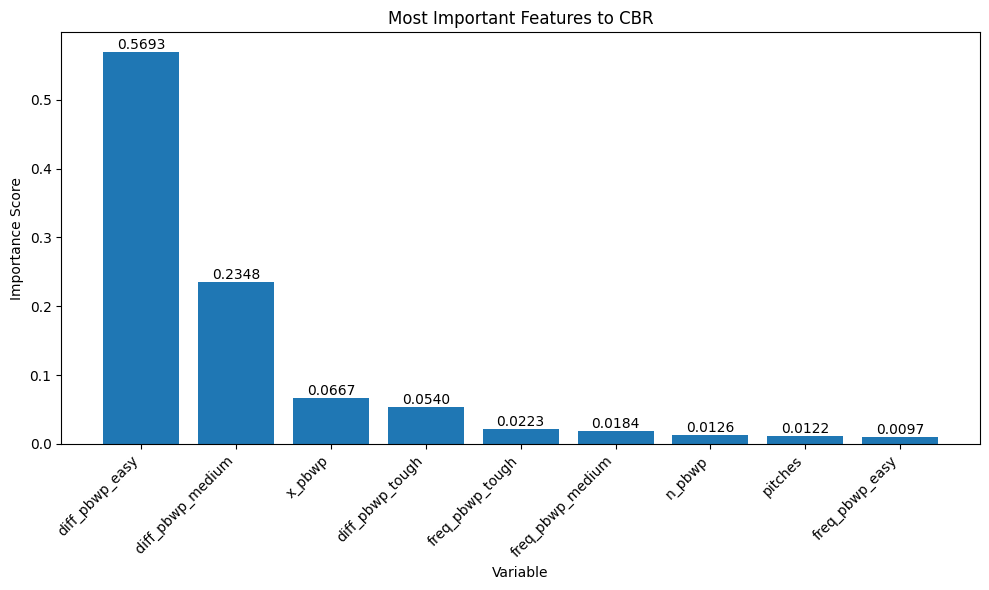

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Variable')
plt.ylabel('Importance Score')
plt.title('Most Important Features to CBR')
plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability

# Add the importance values as text over the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [93]:
# Find the minimum and maximum values for each variable
min_diff_pbwp_easy = block_all['diff_pbwp_easy'].min()
max_diff_pbwp_easy = block_all['diff_pbwp_easy'].max()

min_diff_pbwp_medium = block_all['diff_pbwp_medium'].min()
max_diff_pbwp_medium = block_all['diff_pbwp_medium'].max()

min_x_pbwp = block_all['x_pbwp'].min()
max_x_pbwp = block_all['x_pbwp'].max()

min_diff_pbwp_tough = block_all['diff_pbwp_tough'].min()
max_diff_pbwp_tough = block_all['diff_pbwp_tough'].max()

min_freq_pbwp_tough  = block_all['freq_pbwp_tough'].min()
max_freq_pbwp_tough  = block_all['freq_pbwp_tough'].max()

min_freq_pbwp_medium  = block_all['freq_pbwp_medium'].min()
max_freq_pbwp_medium  = block_all['freq_pbwp_medium'].max()

min_freq_pbwp_easy  = block_all['freq_pbwp_easy'].min()
max_freq_pbwp_easy  = block_all['freq_pbwp_easy'].max()

min_pitches = block_all['pitches'].min()
max_pitches = block_all['pitches'].max()

min_n_pbwp = block_all['n_pbwp'].min()
max_n_pbwp = block_all['n_pbwp'].max()

# Print the minimum and maximum values
print("Minimum diff_pbwp_easy:", min_diff_pbwp_easy)
print("Maximum diff_pbwp_easy:", max_diff_pbwp_easy)

print("Minimum diff_pbwp_medium:", min_diff_pbwp_medium)
print("Maximum diff_pbwp_medium:", max_diff_pbwp_medium)

print("Minimum x_pbwp:", min_x_pbwp)
print("Maximum x_pbwp:", max_x_pbwp)

print("Minimum  diff_pbwp_tough :", min_diff_pbwp_tough )
print("Maximum  diff_pbwp_tough :", max_diff_pbwp_tough )

print("Minimum freq_pbwp_tough:", max_freq_pbwp_tough)
print("Maximum freq_pbwp_tough:", min_freq_pbwp_tough)

print("Minimum freq_pbwp_medium:", min_freq_pbwp_medium)
print("Maximum freq_pbwp_medium:", max_freq_pbwp_medium)

print("Minimum freq_pbwp_easy:", min_freq_pbwp_easy)
print("Maximum freq_pbwp_easy:", max_freq_pbwp_easy)

print("Minimum pitches:", min_pitches)
print("Maximum pitches:", max_pitches)

print("Minimum n_pbwp:", min_n_pbwp)
print("Maximum n_pbwp:", max_n_pbwp)

Minimum diff_pbwp_easy: -10.03631816
Maximum diff_pbwp_easy: 10.77733156
Minimum diff_pbwp_medium: -15.43266491
Maximum diff_pbwp_medium: 8.038219804
Minimum x_pbwp: 8.541459012
Maximum x_pbwp: 50.83412572
Minimum  diff_pbwp_tough : -6.212052254
Maximum  diff_pbwp_tough : 4.622812912
Minimum freq_pbwp_tough: 0.019160584
Maximum freq_pbwp_tough: 0.005559968
Minimum freq_pbwp_medium: 0.022905759
Maximum freq_pbwp_medium: 0.05099278
Minimum freq_pbwp_easy: 0.932177616
Maximum freq_pbwp_easy: 0.969023034
Minimum pitches: 1015
Maximum pitches: 5121
Minimum n_pbwp: 9
Maximum n_pbwp: 54


In [94]:
# Normalize the variables
normalized_diff_pbwp_easy = (block_all['diff_pbwp_easy'] - min_diff_pbwp_easy) / (max_diff_pbwp_easy - min_diff_pbwp_easy)

normalized_diff_pbwp_medium = (block_all['diff_pbwp_medium'] - min_diff_pbwp_medium) / (max_diff_pbwp_medium - min_diff_pbwp_medium)

normalized_x_pbwp = (block_all['x_pbwp'] - min_x_pbwp) / (max_x_pbwp - min_x_pbwp)

normalized_diff_pbwp_tough = (block_all['diff_pbwp_tough'] - min_diff_pbwp_tough) / (max_diff_pbwp_tough - min_diff_pbwp_tough)

normalized_freq_pbwp_tough = (block_all['freq_pbwp_tough'] - min_freq_pbwp_tough) / (max_freq_pbwp_tough - min_freq_pbwp_tough)

normalized_freq_pbwp_medium = (block_all['freq_pbwp_medium'] - min_freq_pbwp_medium) / (max_freq_pbwp_medium - min_freq_pbwp_medium)

normalized_freq_pbwp_easy = (block_all['freq_pbwp_easy'] - min_freq_pbwp_easy) / (max_freq_pbwp_easy - min_freq_pbwp_easy)

normalized_pitches = (block_all['pitches'] - min_pitches) / (max_pitches - min_pitches)

normalized_n_pbwp = (block_all['n_pbwp'] - min_n_pbwp) / (max_n_pbwp - min_n_pbwp)

# Display the normalized values
block_all['diff_pbwp_easy'] = normalized_diff_pbwp_easy

block_all['diff_pbwp_medium'] = normalized_diff_pbwp_medium

block_all['x_pbwp'] = normalized_x_pbwp

block_all['diff_pbwp_tough'] = normalized_diff_pbwp_tough

block_all['freq_pbwp_tough'] = normalized_freq_pbwp_tough

block_all['normalized_freq_pbwp_medium'] = normalized_freq_pbwp_medium

block_all['normalized_freq_pbwp_easy'] = normalized_freq_pbwp_easy

block_all['pitches'] = normalized_pitches

block_all['n_pbwp'] = normalized_n_pbwp

print(block_all[['diff_pbwp_easy', 'diff_pbwp_medium', 'x_pbwp','diff_pbwp_tough', 'freq_pbwp_tough', 'normalized_freq_pbwp_medium', 'normalized_freq_pbwp_easy', 'pitches', 'n_pbwp']])



    diff_pbwp_easy  diff_pbwp_medium    x_pbwp  diff_pbwp_tough  \
0         0.818401          0.915244  0.806946         1.000000   
1         0.837441          0.898864  0.711897         0.720190   
2         0.977111          0.906081  1.000000         0.361002   
3         0.766653          0.777238  0.359316         0.850922   
4         1.000000          0.676257  0.880628         0.625814   
..             ...               ...       ...              ...   
61        0.455895          0.431732  0.001557         0.338389   
62        0.312442          0.544121  0.429656         0.287935   
63        0.000000          0.788570  0.453786         0.175904   
64        0.220602          0.413350  0.376180         0.538903   
65        0.019259          0.000000  0.486181         0.589167   

    freq_pbwp_tough  normalized_freq_pbwp_medium  normalized_freq_pbwp_easy  \
0          1.000000                     0.917009                   0.000000   
1          0.568829                  

In [95]:
# Importance scores from the importance model
importance_scores = {
    "diff_pbwp_easy": 0.569345,
    "diff_pbwp_medium": 0.234765,
    "x_pbwp": 0.066677,
    "diff_pbwp_tough": 0.054000,
    "freq_pbwp_tough": 0.022312,
    "freq_pbwp_medium": 0.018361,
    "freq_pbwp_easy": 0.012603,
    "pitches": 0.012202,
    "n_pbwp": 0.009735,
}

# Calculate the sum of importance scores
total_importance = sum(importance_scores.values())

# Normalize and assign weights
weights = {}
for feature, importance in importance_scores.items():
    normalized_importance = importance / total_importance
    weights[feature] = normalized_importance

# Print the weights
print("Feature Weights:")
for feature, weight in weights.items():
    print(f"{feature}: {weight}")


Feature Weights:
diff_pbwp_easy: 0.569345
diff_pbwp_medium: 0.234765
x_pbwp: 0.066677
diff_pbwp_tough: 0.054
freq_pbwp_tough: 0.022312
freq_pbwp_medium: 0.018361
freq_pbwp_easy: 0.012603
pitches: 0.012202
n_pbwp: 0.009735


In [96]:
# Define weights for each variable
weight_diff_pbwp_easy = 0.569345
weight_diff_pbwp_medium = 0.234765
weight_x_pbwp = 0.066677
weight_diff_pbwp_tough = 0.054
weight_freq_pbwp_tough = 0.022312
weight_freq_pbwp_medium = 0.018361
weight_freq_pbwp_easy = 0.012603
weight_pitches = 0.012202
weight_n_pbwp = 0.009735


# Normalize the weights to add up to 1.0
total_weight_sum = (
   weight_diff_pbwp_easy +
   weight_diff_pbwp_medium +
   weight_x_pbwp +
   weight_diff_pbwp_tough +
   weight_freq_pbwp_tough +
   weight_freq_pbwp_medium +
   weight_freq_pbwp_easy +
   weight_pitches +
   weight_n_pbwp
)

weight_diff_pbwp_easy /= total_weight_sum
weight_diff_pbwp_medium /= total_weight_sum
weight_x_pbwp /= total_weight_sum
weight_diff_pbwp_tough /= total_weight_sum
weight_freq_pbwp_tough  /= total_weight_sum
weight_freq_pbwp_medium /= total_weight_sum
weight_freq_pbwp_easy /= total_weight_sum
weight_pitches /= total_weight_sum
weight_n_pbwp/= total_weight_sum

# Display the normalized weights
print("Normalized Weights:")
print("diff_pbwp_easy:", weight_diff_pbwp_easy)
print("diff_pbwp_medium:", weight_diff_pbwp_medium)
print("x_pbwp:", weight_x_pbwp)
print("diff_pbwp_tough:", weight_diff_pbwp_tough)
print("freq_pbwp_tough:", weight_freq_pbwp_tough)
print("freq_pbwp_medium:", weight_freq_pbwp_medium)
print("freq_pbwp_easy:", weight_freq_pbwp_easy)
print("pitches:", weight_pitches)
print("n_pbwp:", weight_n_pbwp)

Normalized Weights:
diff_pbwp_easy: 0.569345
diff_pbwp_medium: 0.234765
x_pbwp: 0.066677
diff_pbwp_tough: 0.054
freq_pbwp_tough: 0.022312
freq_pbwp_medium: 0.018361
freq_pbwp_easy: 0.012603
pitches: 0.012202
n_pbwp: 0.009735


In [97]:
CBR =(0.569345 * normalized_diff_pbwp_easy)+ (0.234765 * normalized_diff_pbwp_medium) +(0.066677 * normalized_x_pbwp) +(0.054 * normalized_diff_pbwp_tough) +(0.022312 * normalized_freq_pbwp_tough) +(0.018361 * normalized_freq_pbwp_medium) +(0.012603 * normalized_freq_pbwp_easy) +(0.012202 * normalized_pitches +(0.009735 * normalized_n_pbwp))

In [98]:
block_all['CBR'] =  (
    weight_diff_pbwp_easy * block_all['diff_pbwp_easy'] +
    weight_diff_pbwp_medium * block_all['diff_pbwp_medium'] +
    weight_x_pbwp * block_all['x_pbwp'] +
    weight_diff_pbwp_tough * block_all['diff_pbwp_tough'] +
    weight_freq_pbwp_tough * block_all['freq_pbwp_tough'] +
    weight_freq_pbwp_medium * block_all['freq_pbwp_medium'] +
    weight_pitches * block_all['freq_pbwp_easy'] +
    weight_pitches * block_all['pitches'] +
    weight_n_pbwp * block_all['n_pbwp']
)

In [99]:
CBR_scores = block_all['CBR']

# Check if there are any missing or NaN values in the 'TDIR_scores'
if CBR_scores.isnull().any():
    raise ValueError("CAR scores contain missing or NaN values")

# Calculate the average TDIR score
average_CBR = CBR_scores.mean()

print("Average CBR:", average_CBR)

Average CBR: 0.539964996763319


In [100]:
print(block_all[['player_name', 'CBR']])

         player_name       CBR
0   Rutschman, Adley  0.833421
1      Trevino, Jose  0.810131
2     Realmuto, J.T.  0.892691
3    Kirk, Alejandro  0.710579
4       Murphy, Sean  0.853835
..               ...       ...
61      Zunino, Mike  0.400802
62        Bart, Joey  0.379535
63       Haase, Eric  0.258737
64  Grandal, Yasmani  0.306229
65      Melendez, MJ  0.110089

[66 rows x 2 columns]
